## Importing libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('train_data.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
X = data.iloc[:,2:4].values
X.shape

(400, 2)

In [6]:
y = data.iloc[:,4:5].values
y.shape

(400, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320, 1)
(80, 1)
(320,)
(80,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_test)

[[ 1.04512661  1.35164117]
 [-1.16385962 -1.07163461]
 [ 0.38243074 -0.42148745]
 [-0.83251168  0.34686829]
 [-0.16981582 -0.53969602]
 [ 1.26602523  0.08089899]
 [ 0.60332936  1.08567188]
 [ 1.15557592 -0.59880031]
 [-0.942961   -0.36238316]
 [-0.50116375  0.84925473]
 [ 0.27198143 -0.36238316]
 [ 2.48096766  2.11999691]
 [ 1.15557592  2.14954905]
 [-0.72206237 -0.27372673]
 [ 1.59737317  1.85402761]
 [ 0.38243074 -0.1850703 ]
 [ 2.37051835 -0.71700889]
 [-1.60565686 -0.48059174]
 [-0.16981582  0.16955542]
 [-0.83251168 -0.30327887]
 [-0.39071444 -0.06686173]
 [ 0.49288005 -0.59880031]
 [-1.27430893  0.25821186]
 [-0.0593665  -0.51014388]
 [-0.28026513  0.02179471]
 [-0.0593665   2.14954905]
 [-1.27430893 -1.1307389 ]
 [-1.82655549 -1.42626033]
 [ 1.26602523 -1.1307389 ]
 [ 0.27198143  1.85402761]
 [ 1.15557592 -1.51491676]
 [-0.16981582 -0.48059174]
 [-0.61161306  0.52418115]
 [ 0.27198143  1.02656759]
 [-0.942961    0.46507686]
 [ 1.70782248 -0.98297818]
 [ 1.26602523  1.76537118]
 

In [10]:
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


## To find K 


In [11]:
print(np.sqrt(X_train.shape[0]))

17.88854381999832


In [12]:
k = 17

## Building the model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = k)
model

KNeighborsClassifier(n_neighbors=17)

In [14]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred.shape)
print(y_test.shape)

(80,)
(80,)


## Finding accuracy of the model

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,y_pred)

0.9375

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52,  2],
       [ 3, 23]], dtype=int64)

## Accuracy for different values of k (Trial and Error method)

In [31]:
accuracy_list = []
for i in range(1,280):
    model1 = KNeighborsClassifier(n_neighbors = i)
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    accuracy_list.append(accuracy_score(y_test,y_pred))
print(accuracy_list)    

[0.9125, 0.9, 0.95, 0.9375, 0.9375, 0.9375, 0.95, 0.9375, 0.95, 0.9375, 0.95, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9125, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.925, 0.925, 0.9125, 0.9125, 0.9, 0.9, 0.8875, 0.9, 0.9, 0.9, 0.8875, 0.8875, 0.875, 0.875, 0.875, 0.8875, 0.8625, 0.8875, 0.875, 0.875, 0.8625, 0.8625, 0.85, 0.85, 0.8375, 0.85, 0.8375, 0.85, 0.8375, 0.8375, 0.8375, 0.8375, 0.8375, 0.8375, 0.8125, 0.825, 0.8, 0.8375, 0.825, 0.825, 0.8, 0.8, 0.8, 0.8, 0.7875, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7875, 0.7875, 0.7875, 0.7875, 0.775, 0.775, 0.7625, 0.775, 0.75, 0.75, 0.75, 0.

In [32]:
print("The maximum accuracy achieved using trial and error is",max(accuracy_list))

The maximum accuracy achieved using trial and error is 0.95


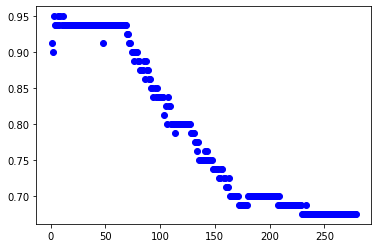

In [33]:
plt.plot(range(1,280),accuracy_list, 'bo')

## Making the meshgrids

In [34]:
x_ex = np.linspace(-20,20,1000)
y_ex = np.linspace(-25,25,900)
xx_ex, yy_ex = np.meshgrid(x_ex,y_ex)
print(xx_ex.shape,yy_ex.shape)
print(xx_ex)
print(yy_ex)

(900, 1000) (900, 1000)
[[-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 ...
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]
 [-20.         -19.95995996 -19.91991992 ...  19.91991992  19.95995996
   20.        ]]
[[-25.         -25.         -25.         ... -25.         -25.
  -25.        ]
 [-24.94438265 -24.94438265 -24.94438265 ... -24.94438265 -24.94438265
  -24.94438265]
 [-24.88876529 -24.88876529 -24.88876529 ... -24.88876529 -24.88876529
  -24.88876529]
 ...
 [ 24.88876529  24.88876529  24.88876529 ...  24.88876529  24.88876529
   24.88876529]
 [ 24.94438265  24.94438265  24.94438265 ...  24.94438265  24.94438265
   24.94438265]
 [ 25.          

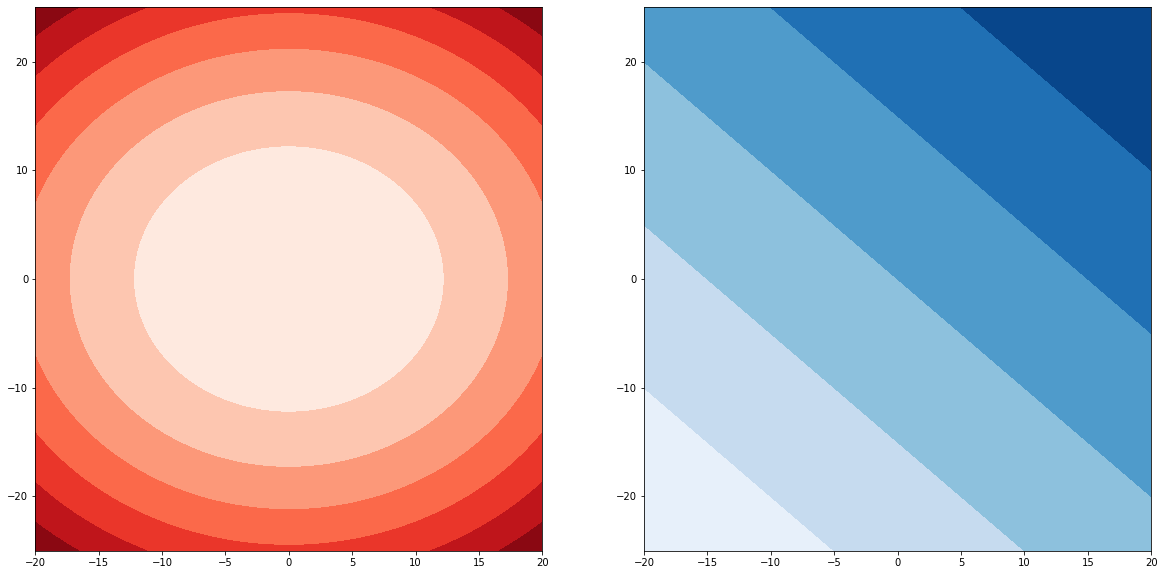

In [35]:
z = xx_ex**2 + yy_ex**2
z1 = xx_ex + yy_ex
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.contourf(xx_ex,yy_ex,z,cmap = 'Reds')
plt.subplot(122)
plt.contourf(xx_ex,yy_ex,z1,cmap = 'Blues')
plt.show()

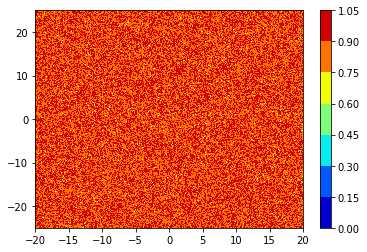

In [36]:
z2 = np.random.rand(900,1000) 
plt.contourf(xx_ex,yy_ex,z2,cmap = 'jet')
plt.colorbar()
plt.show()

## Creating meshgrid for our data

In [37]:
x_age = np.arange(start = X_train[:,0].min() - 1,stop = X_train[:,0].max() + 1,step = 0.01) #Creating points for the age
x_salary = np.arange(start = X_train[:,1].min() - 1,stop = X_train[:,1].max() + 1,step = 0.01) #Creating points for the salary
print(x_salary.shape) ## Can have different shape than x_age because minimum and maximum depends on the data.
print(x_age.shape)
XX,YY = np.meshgrid(x_age,x_salary)
print(XX.shape)
print(YY.shape)

(596,)
(590,)
(596, 590)
(596, 590)


## Classification of each data point

In [38]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=model.predict(input_array)

In [28]:
print(labels.shape)
t = 0
for i in range(len(labels)):
    if labels[i] == 1:
        t = t + 1
print(t)    

(351640,)
214620


 ## Plotting the Decision Boundary

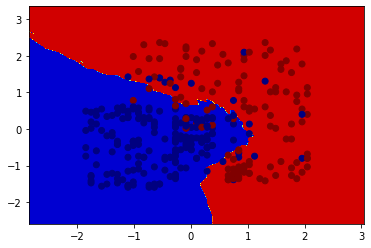

In [29]:
plt.contourf(XX,YY,labels.reshape(XX.shape),cmap = 'jet')
plt.scatter(X_train[:,0],X_train[:,1],c = y_train[:],cmap ='jet')
plt.show()

## Effect of K on Decision Boundaries

In [90]:
def effect_k(data,k_value):
    df = pd.read_csv('datasets/{}'.format(data))
    X = df.iloc[:,0:2].values
    y = df.iloc[:,2].values
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X,y)
    
    a = np.arange(start = X[:,0].min() - 1,stop = X[:,0].max() + 1,step = 0.1)
    b = np.arange(start = X[:,1].min() - 1,stop = X[:,1].max() + 1,step = 0.1)
    
    XX,YY = np.meshgrid(a,b)
    input_array = np.array([XX.ravel(),YY.ravel()]).T
    labels = knn.predict(input_array)
    
    plt.contourf(XX,YY,labels.reshape(XX.shape))
    plt.scatter(X[:,0],X[:,1],c = y)
    plt.show()

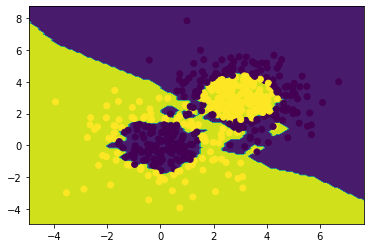

In [91]:
effect_k('concertriccir2.csv', k_value = 1) ##Overfitting

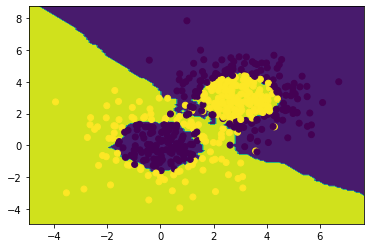

In [92]:
effect_k('concertriccir2.csv', k_value = 5) ##Perfect

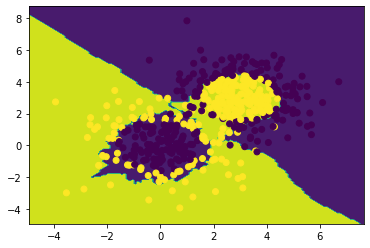

In [93]:
effect_k('concertriccir2.csv', k_value = 30) ##Underfitting (some red points are classified as blue)

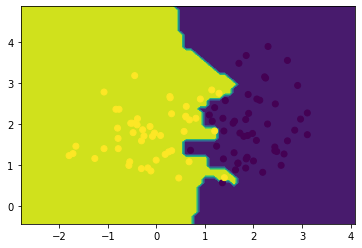

In [94]:
effect_k('linearsep.csv', k_value = 1) ##Overfitting

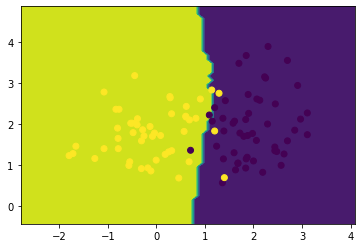

In [95]:
effect_k('linearsep.csv', k_value = 11) ##Perfect

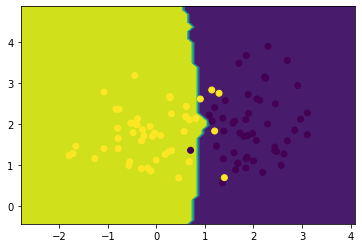

In [96]:
effect_k('linearsep.csv', k_value = 40) ##Underfitting

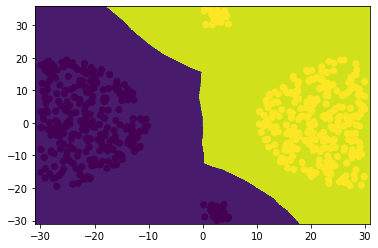

In [97]:
effect_k('outlier.csv', k_value = 1)

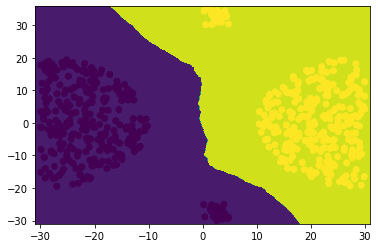

In [98]:
effect_k('outlier.csv', k_value = 40)

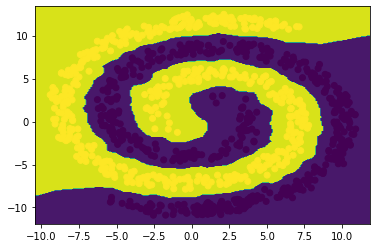

In [99]:
effect_k('twoSpirals.csv', k_value = 1)

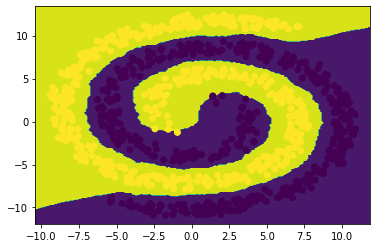

In [100]:
effect_k('twoSpirals.csv', k_value = 14)

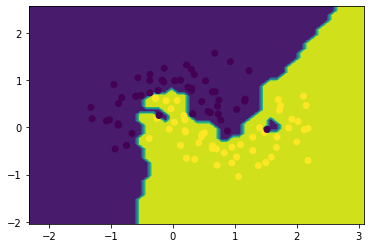

In [101]:
effect_k('ushape.csv', k_value = 1)

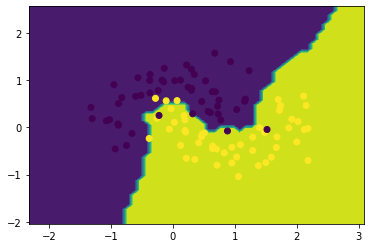

In [102]:
effect_k('ushape.csv', k_value = 10)

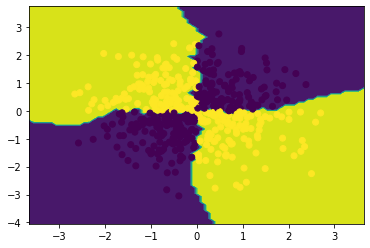

In [103]:
effect_k('xor.csv', k_value = 1)

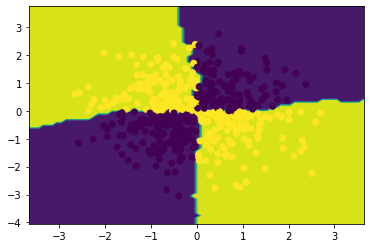

In [104]:
effect_k('xor.csv', k_value = 10)